# Part I - (Prosper Loan Dataset Exploration)
## by (Abdulaziz Otaif)

## Introduction

> The prosper loan dataset contains over 100k loan data and has over 80 columns including borrowing rates and yields associated with each loan, loan term and category, borrower data, and even the number of investors in each loan, and many more features. 



## Preliminary Wrangling


In [613]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [614]:
df = pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', None)
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [615]:
with pd.option_context('display.max_rows', None):
    print(df.isnull().sum())

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

There are column that have more than 50% - 88% missing values, which is too much, we'll drop them.

In [616]:
df.drop(['CreditGrade',
         'ClosedDate',
         'GroupKey',
         'TotalProsperLoans',
         'TotalProsperPaymentsBilled',
         'OnTimeProsperPayments',
         'ProsperPaymentsLessThanOneMonthLate',
         'ProsperPaymentsOneMonthPlusLate',
         'ProsperPrincipalBorrowed',
         'ProsperPrincipalOutstanding',
         'LoanFirstDefaultedCycleNumber'], axis=1, inplace=True)

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   Term                                113937 non-null  int64  
 4   LoanStatus                          113937 non-null  object 
 5   BorrowerAPR                         113912 non-null  float64
 6   BorrowerRate                        113937 non-null  float64
 7   LenderYield                         113937 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null   float64
 9   EstimatedLoss                       84853 non-null   float64
 10  EstimatedReturn                     84853 non-null   float64
 11  ProsperRating (numeric)   

The dates columns are not in a date format, we can use pd.to_datetime() to convert them to datetime.

In [618]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['DateCreditPulled'] = pd.to_datetime(df['DateCreditPulled'])
df['FirstRecordedCreditLine'] = pd.to_datetime(df['FirstRecordedCreditLine'])
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df[['ListingCreationDate','DateCreditPulled','LoanOriginationDate','FirstRecordedCreditLine']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ListingCreationDate      113937 non-null  datetime64[ns]
 1   DateCreditPulled         113937 non-null  datetime64[ns]
 2   LoanOriginationDate      113937 non-null  datetime64[ns]
 3   FirstRecordedCreditLine  113240 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 3.5 MB


In [619]:
# Sort the dataframe by ListingCreationDate in ascending order
df.sort_values(by='ListingCreationDate', ascending=True, inplace=True)

Now let's extract year, quarter, and month from the ListingCreationDate column to use them separatly during analyses.

In [620]:
df['Year'] = df['ListingCreationDate'].dt.year
df['Quarter'] = df['ListingCreationDate'].dt.quarter
df['Month'] = df['ListingCreationDate'].dt.month

Checking for duplicated listings.

In [621]:
df['ListingKey'].duplicated().sum()

871

In [622]:
df.drop_duplicates(subset='ListingKey', inplace=True)

Finally, we need to map ListingCategory numerical values to their text meaningful values

In [623]:
listing_category = {0 : "Not Available",
                    1 : "Debt Consolidation",
                    2 : "Home Improvement",
                    3 : "Business",
                    4 : "Personal Loan",
                    5 : "Student Use",
                    6 : "Auto",
                    7 : "Other",
                    8 : "Baby&Adoption",
                    9 : "Boat",
                    10 : "Cosmetic Procedure",
                    11 : "Engagement Ring",
                    12 : "Green Loans",
                    13 : "Household Expenses",
                    14 : "Large Purchases",
                    15 : "Medical/Dental",
                    16 : "Motorcycle",
                    17 : "RV",
                    18 : "Taxes",
                    19 : "Vacation",
                    20 : "Wedding Loans"}

df['ListingCategory'] = df['ListingCategory (numeric)'].map(listing_category)

In [624]:
df[['ListingCategory (numeric)', 'ListingCategory']].sample(20)

,ListingCategory (numeric),ListingCategory
55621,0,Not Available
77040,0,Not Available
9878,1,Debt Consolidation
104536,1,Debt Consolidation
17883,1,Debt Consolidation
70585,1,Debt Consolidation
10696,1,Debt Consolidation
104887,1,Debt Consolidation
14277,2,Home Improvement
43473,1,Debt Consolidation


### Descriptive Statistics

In [625]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Year,Quarter,Month
count,1.130660e+05,113066.000000,113041.000000,113066.000000,113066.000000,83982.000000,83982.000000,83982.000000,83982.000000,83982.000000,113066.000000,105441.000000,112475.000000,112475.000000,105462.000000,105462.000000,112369.000000,113066.000000,113066.000000,112369.000000,111907.000000,112369.000000,105444.000000,112076.000000,112369.000000,105462.000000,1.054620e+05,105462.000000,105522.000000,105522.000000,105522.000000,105522.000000,104594.000000,1.130660e+05,18912.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000
mean,6.248036e+05,40.800170,0.218980,0.192946,0.182882,0.168870,0.080417,0.096246,4.068705,5.953514,2.776838,96.060584,685.524961,704.524961,10.307058,9.248336,26.746380,6.959466,397.820998,1.438600,5.590812,0.595129,986.818434,4.158892,0.312764,0.015209,1.759230e+04,0.561088,11208.182028,23.221518,0.885552,0.802089,0.276032,5.605120e+03,-3.229537,153.991403,32.121770,69044.527992,8314.762307,271.932742,4209.236052,3125.487227,1083.748825,-55.019639,-14.350991,705.842206,686.669798,25.336372,0.998573,0.048379,0.023641,16.678249,80.876143,2010.994968,2.532830,6.582386
std,3.273262e+05,10.421518,0.080483,0.074917,0.074612,0.068607,0.046851,0.030475,1.675442,2.373162,3.998188,94.432241,66.635895,66.635895,5.458196,5.021249,13.643731,4.629303,447.657266,2.444093,6.446342,1.984234,7156.683653,10.163465,0.728792,0.154691,3.294590e+04,0.318189,19847.681185,11.875303,0.148428,1.097975,0.553738,7.495596e+03,50.063023,467.919931,29.978915,38800.158867,6237.007841,192.549979,4798.081994,4076.877459,1185.533024,60.794092,109.645216,2396.901814,2365.467115,276.708803,0.017987,0.333580,0.233296,295.674170,103.340277,2.505675,1.140866,3.548352
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-209.000000,0.000000,0.000000,1.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000,2005.000000,1.000000,1.000000
25%,3.976670e+05,36.000000,0.156290,0.134000,0.124500,0.116000,0.042400,0.074630,3.000000,4.000000,1.000000,26.000000,660.000000,679.000000,7.000000,6.000000,17.000000,4.000000,113.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.099000e+03,0.310000,876.000000,15.000000,0.820000,0.000000,0.140000,3.199396e+03,-35.000000,0.000000,6.000000,37106.250000,4000.000000,130.950000,1018.800000,512.577500,279

### What is the structure of your dataset?

> After cleaning, the dataset consists of 74 columns and 113066 observations. 52 columns are numerical, 7 dates (including Year, Quarter, and Month columns), 3 IDs, and the other 11 columns are categorical.

### What is/are the main feature(s) of interest in your dataset?

> I'm mainly interested in the rates related features (BorrowerAPR, BorrowerRate, LenderYield etc.) as well as ProsperScore and Investors, I want to see how they ralate to each other and other features in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think investigating the relationship of features of interest with other features such as BorrowerState, EmploymentStatus, Occupation, Term, StatedMonthlyIncome, and other features can result in uncovering interesting insights.

## Univariate Exploration

### Data Distribution

#### How the data distribution look like ?

In [626]:
# A function that takes column name, number of bins, and title to plot the data distribution
def plot_distribution(x, bins, title):
    plt.figure(figsize=(10, 6))
    sb.histplot(data=df, x=x, bins=bins)
    plt.title(title)

#### Loan Amount Distribution

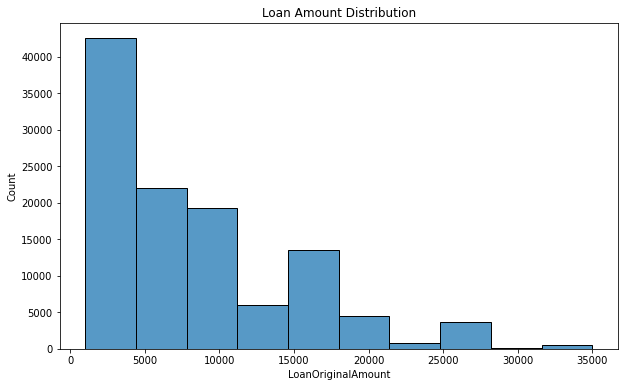

In [627]:
plot_distribution('LoanOriginalAmount', 10, 'Loan Amount Distribution')

The distribution of the amount of loans is skewed to the right, the number of loans decreases as the amount increases. The minimum loan amount is 1,000, and the maximum is 35,000.

#### Borrower APR Distribution

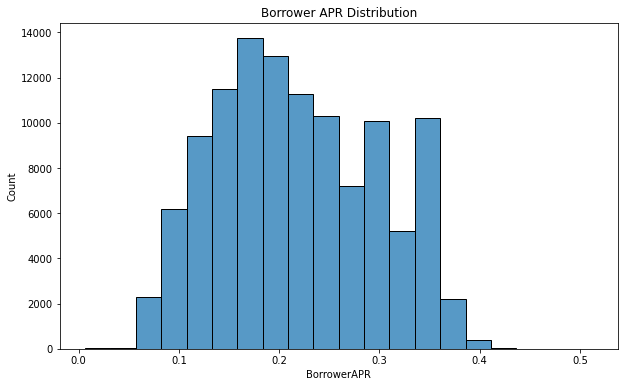

In [628]:
plot_distribution('BorrowerAPR', 20, 'Borrower APR Distribution')

The annual percentage rate looks a little bit skewed to the right, with most of the rates between 10% and 40%.

#### Estimated Return Distribution

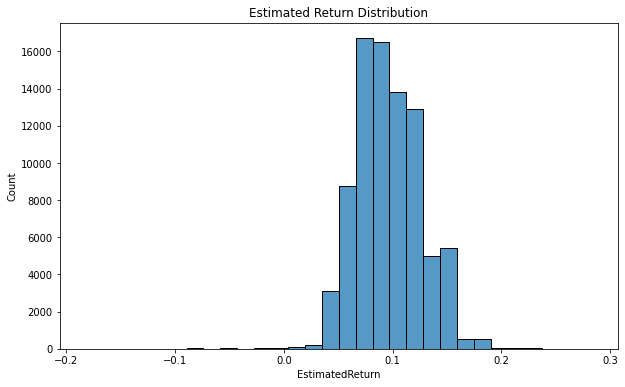

In [629]:
plot_distribution('EstimatedReturn', 30, 'Estimated Return Distribution')

The estimated returns mostly lie between 5% and 15% with small amount of loans that have up to 30% returns, some loans have negative returns that reach -20%.

#### Prosper Score Distribution

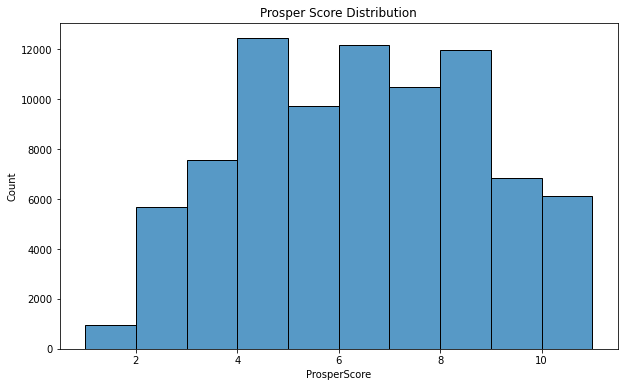

In [630]:
plot_distribution('ProsperScore', 10, 'Prosper Score Distribution')

The prosper score distribution looks symmetrical but there are very few loans that have prosper score lower than 3 which means high risk loans.

#### Employment Status Duration Distribution

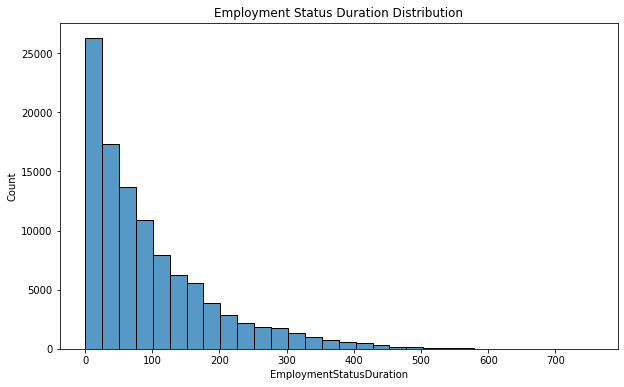

In [631]:
plot_distribution('EmploymentStatusDuration', 30, 'Employment Status Duration Distribution')

#### Stated Monthly Income Distribution

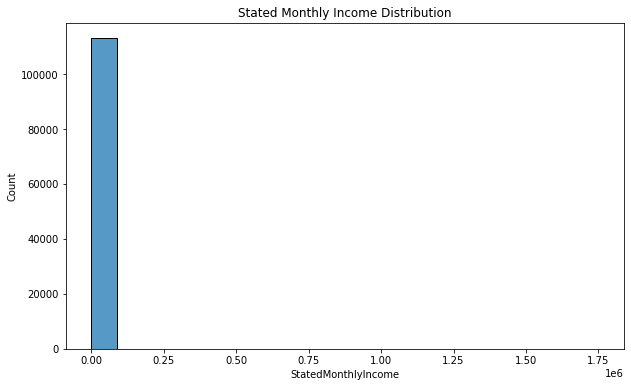

In [632]:
plot_distribution('StatedMonthlyIncome', 20, 'Stated Monthly Income Distribution')

Looks like the linear scale isn't the appropriate scale to visualize the distribution of this column, we need to change the scale to log scale.

Text(0.5, 1.0, 'Stated Monthly Income Distribution')

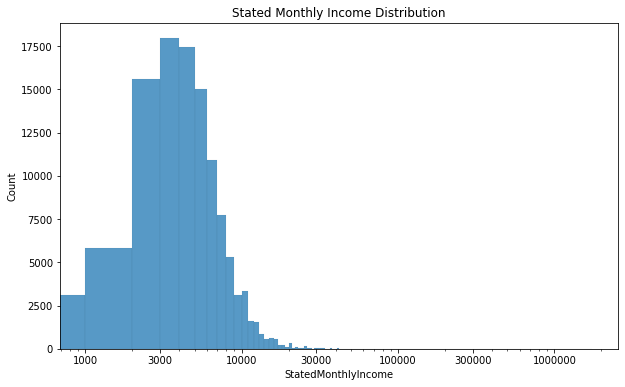

In [633]:
bins = np.arange(0, df['StatedMonthlyIncome'].max()+1000, 1000)
ticks = [1000, 3000, 10000, 30000, 100000, 300000, 1000000]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x='StatedMonthlyIncome', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Stated Monthly Income Distribution')

Monthly income has a right-skewed distribution with a long tail to the right which are outliers that earn more than 30,000.

In [634]:
# A function that takes column name, figure size, and title to plot a count plot
def count_plot(column, size_x, size_y , title):
    plt.figure(figsize=(size_x, size_y))
    base_color = sb.color_palette()[0]
    order = df[column].value_counts().index
    sb.countplot(data=df, y=column, color=base_color, order=order)
    plt.title(title)

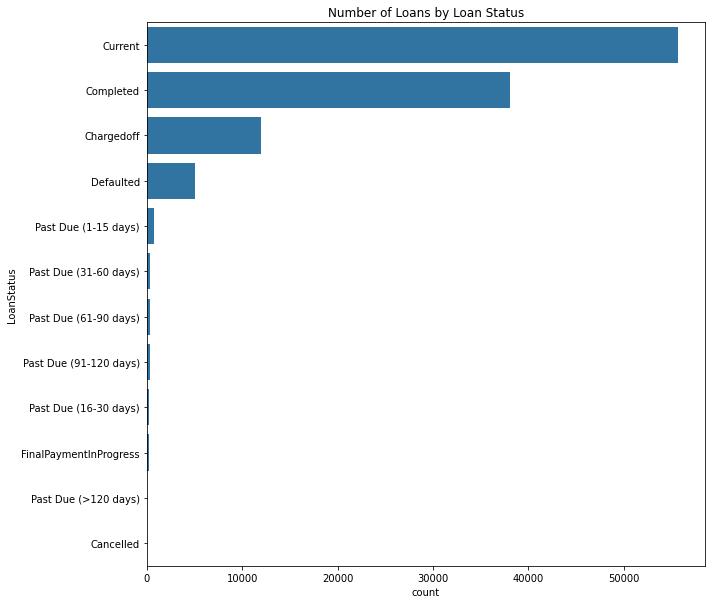

In [635]:
count_plot('LoanStatus', 10, 10, 'Number of Loans by Loan Status')

#### What is the order of states in terms of number of borrowers ?

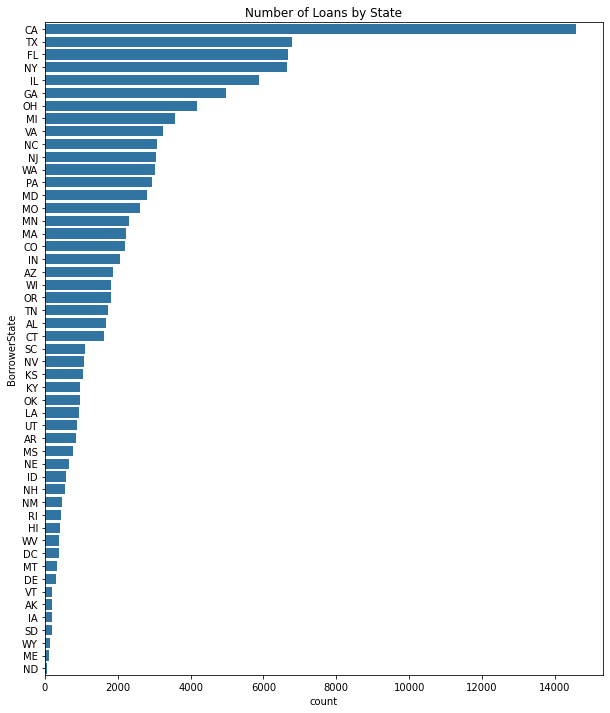

In [636]:
count_plot('BorrowerState', 10, 12, 'Number of Loans by State')

> California is at the top with the highest number of borrowers, followed by Texas, Florida, and New York. North Dakota is at the bottom as the state with lowest number of borrowers.

#### What are the top occupations in terms of number of loans ?

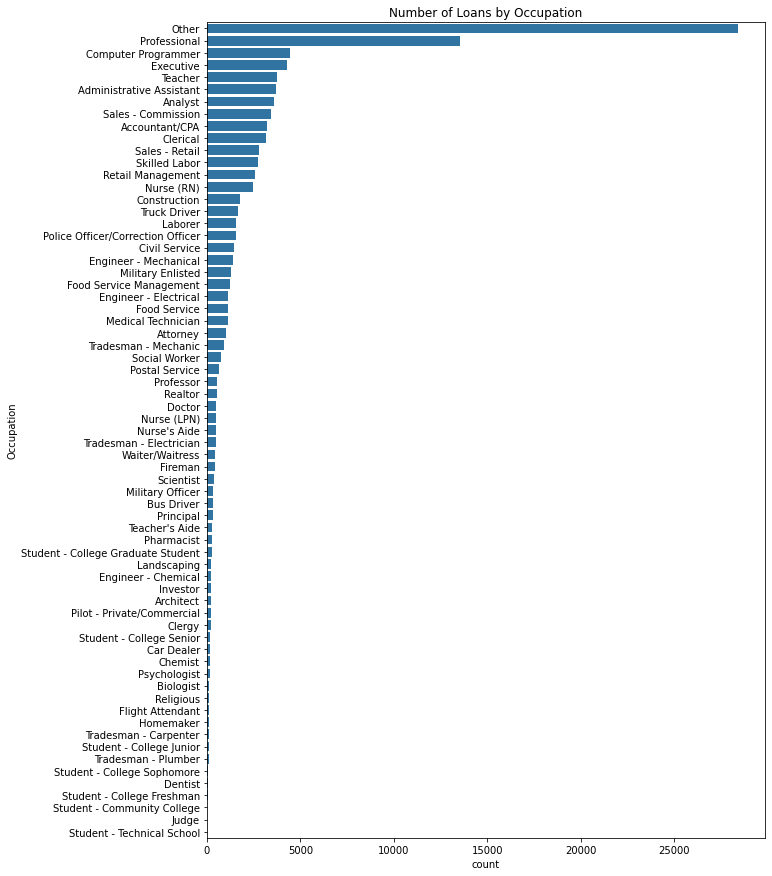

In [637]:
count_plot('Occupation', 10, 15, 'Number of Loans by Occupation')

> Professional is at the top as the occupation with the highest number of loans, followed by computer programmer, executive, teacher, adminitrative assistant, and analyst. Surprisingly, students are at the bottom of the list.

#### What is the order of the different employment status in terms of number of loans per each employment status ?

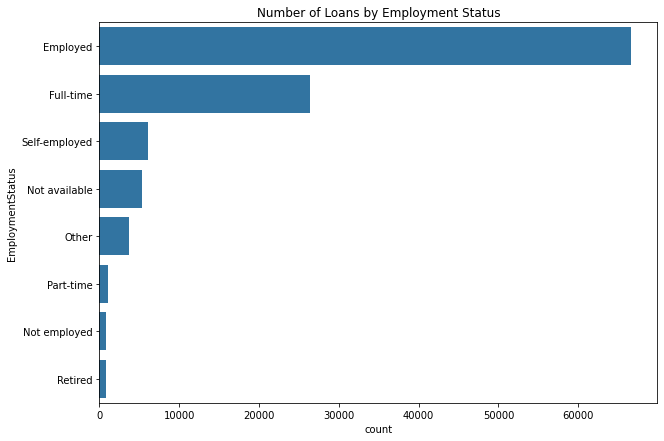

In [638]:
count_plot('EmploymentStatus', 10, 7, 'Number of Loans by Employment Status')

> The vast majority of borrowers are employed. Retires have the lowest number of loans, even lower than unemployed people.

In [639]:
# A function that takes column name, figure size, and title to plot a count plot
def count_plot(column, size, dec, title):
    grouped = df.groupby([column]).size()
    labels = list(grouped.index)
    grouped = list(grouped)
    colors = sb.color_palette('pastel')
    plt.figure(figsize=(size,size))
    plt.pie(grouped, labels=labels, colors=colors, autopct=f'%.{dec}f%%')
    plt.title(title)

#### What is the percentage of homeowners, is it much higher or lower than non-homeowner ?

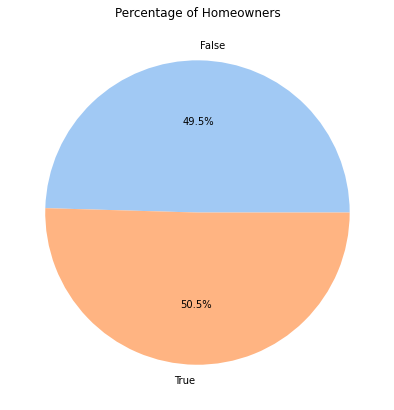

In [640]:
count_plot('IsBorrowerHomeowner', 7, 1, 'Percentage of Homeowners')

> The percentage of homeowner and non-homeowner is almost exactly the same.

#### What is the percentage of loans for each loan term ?

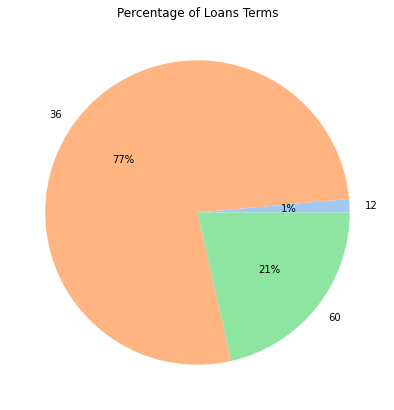

In [641]:
count_plot('Term', 7, 0, 'Percentage of Loans Terms')

> The majority of the loans are repaid over 36 months, almost a quarter of the loans are repaid over 60 months, and only 1% are repaid over 12 months.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the variables distributions are right-skewed. I had to use log scale to visualize the stated monthly income distribution because the vast majority of the borrowers have monthly income between 1,000 and 10,000 and some outliers have extreamly higher income (up to 1,750,000) therefore the linear scale shows only one bar.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions other than the monthly income distribution which is discussed in the answer of the question above.

## Bivariate Exploration

#### Does lender yield has an effect on the estimated loss ? how do they relate to each other ?

Text(0.5, 1.0, 'Lender Yield vs. Estimated Loss')

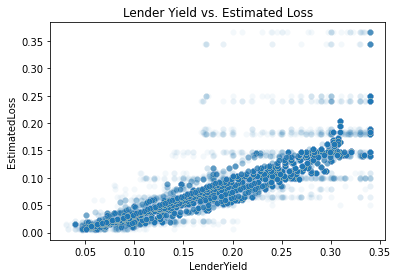

In [642]:
sb.scatterplot(data=df, x='LenderYield', y='EstimatedLoss', alpha = 1/20)
plt.title('Lender Yield vs. Estimated Loss')

> Lender yield and the estimated loss are correlated, as lender yield go higher, the estimated loss tend to go higher as well. 

#### Does the monthly income have an effect on the amount of loan borrowed ? Are they correlated ?

<AxesSubplot:xlabel='StatedMonthlyIncome', ylabel='LoanOriginalAmount'>

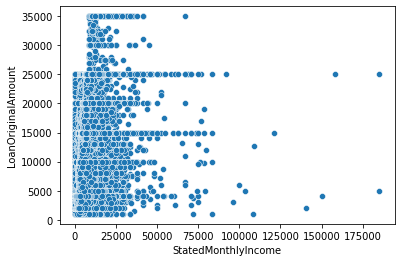

In [643]:
sb.scatterplot(data=df[df['StatedMonthlyIncome'] <= 200000], x='StatedMonthlyIncome', y='LoanOriginalAmount')

> It doesn't look like there is an effect on loan amount by monthly income or there is correlation between the two.

#### How does the rates variables change over time ? Are there any trends ?

Text(0.5, 1.0, 'Average Borrower APR Per Month')

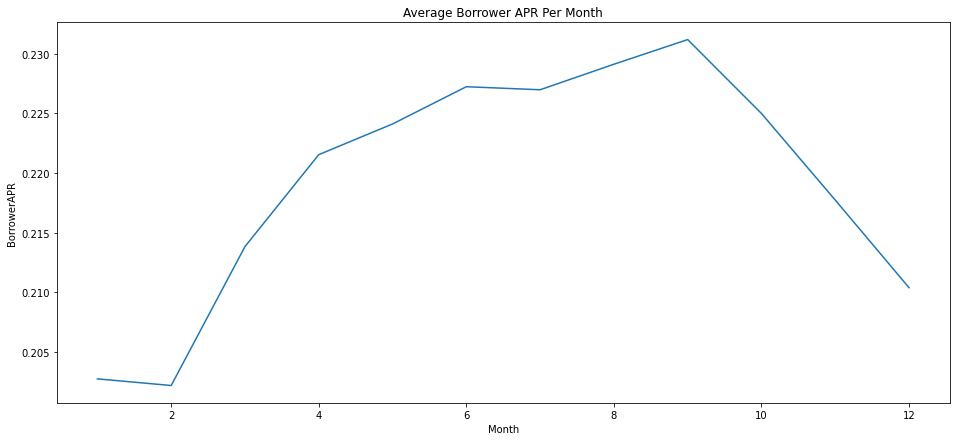

In [644]:
plt.figure(figsize=(16,7))
APR_by_month = df.groupby('Month')['BorrowerAPR'].mean()
sb.lineplot(data=APR_by_month)
plt.title('Average Borrower APR Per Month')

> Interesting! On average, the borrower APR tend to be the highest for loan listings in the middle of the year, and decreases as aproaching the end of the year.

Text(0.5, 1.0, 'Average Prosper Score Per Month')

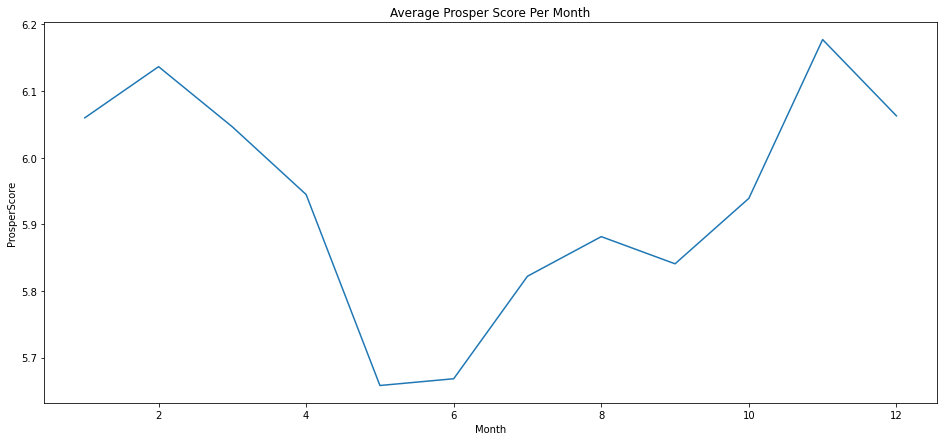

In [645]:
plt.figure(figsize=(16,7))
Pscore_by_month = df.groupby('Month')['ProsperScore'].mean()
sb.lineplot(data=Pscore_by_month)
plt.title('Average Prosper Score Per Month')

> Another pattern here, the prosper score tend to be on average the lowest for loan listings in the middle of the year, and increases as aproaching the end of the year.

Text(0.5, 1.0, 'Average Number of Investors Per Month')

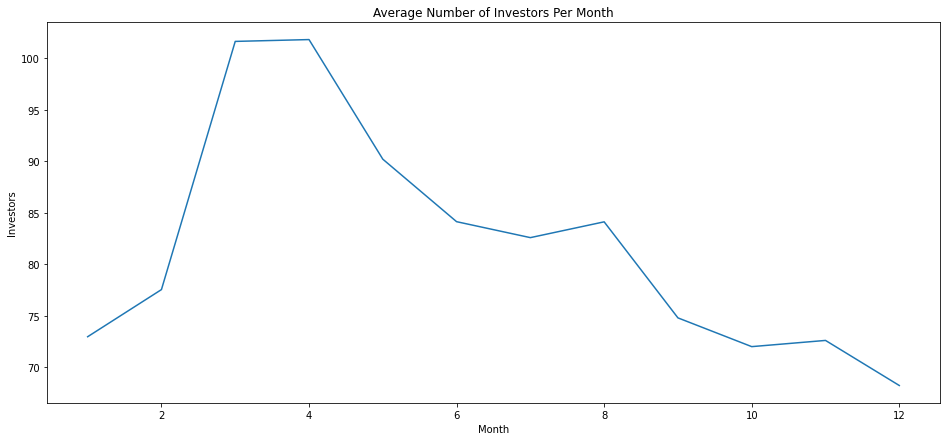

In [646]:
plt.figure(figsize=(16,7))
investors_by_month = df.groupby('Month')['Investors'].mean()
sb.lineplot(data=investors_by_month)
plt.title('Average Number of Investors Per Month')

> The average number of investors per loan listing tend to be the highest between February and May, and decreases gradually as approaching the end of the year.

Text(0.5, 1.0, 'Average Loan Amount Per Month')

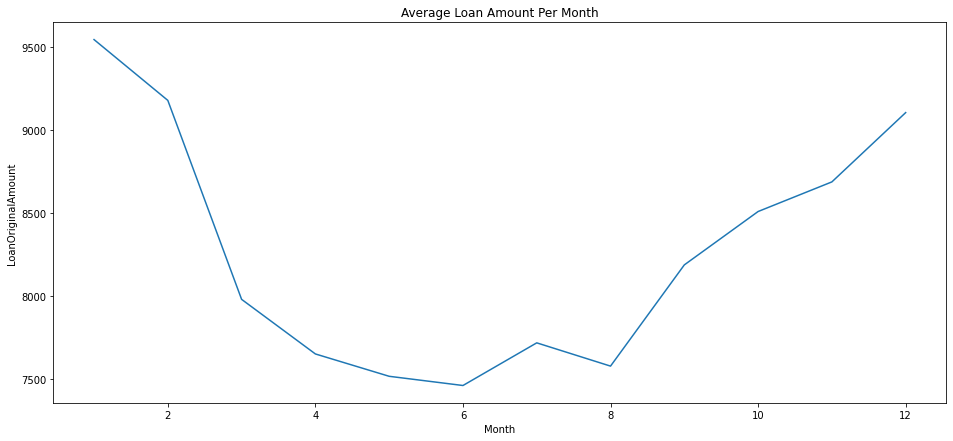

In [647]:
plt.figure(figsize=(16,7))
APR_by_month = df.groupby('Month')['LoanOriginalAmount'].mean()
sb.lineplot(data=APR_by_month)
plt.title('Average Loan Amount Per Month')

> The average amount of loans borrowed tend to be the lowest in the middle of the year, and tend to be the highest in the end/beginning of the year.

#### How do employment statuses compare to each other in terms of prosper score ?

Text(0.5, 1.0, 'Distribution of Prosper Score Per Employment Status')

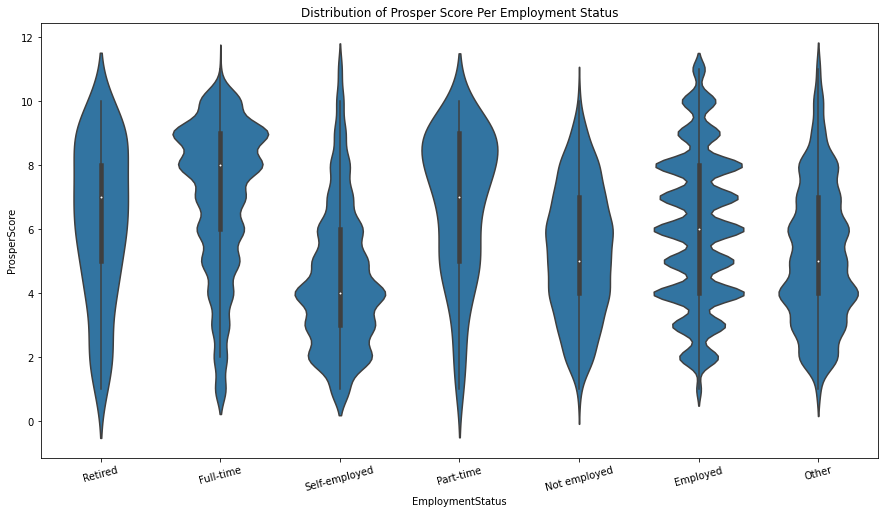

In [648]:
plt.figure(figsize=(15,8))
base_color = sb.color_palette()[0]
sb.violinplot(data=df[df.EmploymentStatus != 'Not available'], x='EmploymentStatus', y='ProsperScore', color=base_color)
plt.xticks(rotation=15)
plt.title('Distribution of Prosper Score Per Employment Status')

> Most self-employed borrowers tend to have lower prosper score or higher risk, there are few self-employed borrowers who have high prosper score compared to other types employment status. Full-time employees have the opposite distribution, most full-time employees tend to have higher prosper score or lower risk.

#### How do different loan terms compare in terms of loan amount ?

Text(0.5, 1.0, 'Distribution of Prosper Score Per Employment Status')

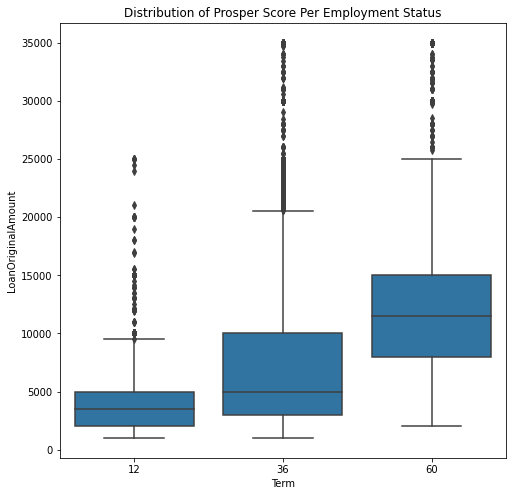

In [649]:
plt.figure(figsize=(8,8))
base_color = sb.color_palette()[0]
sb.boxplot(data=df, x='Term', y='LoanOriginalAmount', color=base_color)
plt.title('Distribution of Prosper Score Per Employment Status')

> Longer loan terms are associated with larger loan amounts, in other words, as loan amount increases, loan term tend to increase as well, which makes sense.

#### Are there any states that have noticeable difference from other states in terms of borrowing APR ?

Text(0.5, 1.0, 'Borrower APR Range Per State')

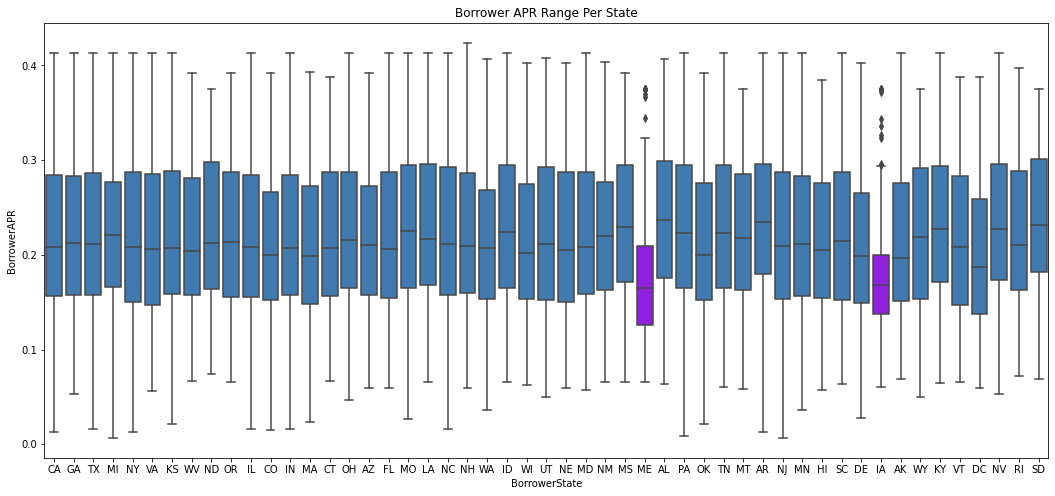

In [650]:
plt.figure(figsize=(18,8))
palette = {state: "#9700FF" if state == "ME" or state == "IA" else "#2D7BC1" for state in df.BorrowerState.unique()}
sb.boxplot(data=df, x='BorrowerState', y='BorrowerAPR', palette=palette)
plt.title('Borrower APR Range Per State')

> Borrowers from Maine and Iowa tend to have relatively lower borrowing APRs compared to other states.

Text(0.5, 1.0, 'Most Common Loan Term By Listing Categories')

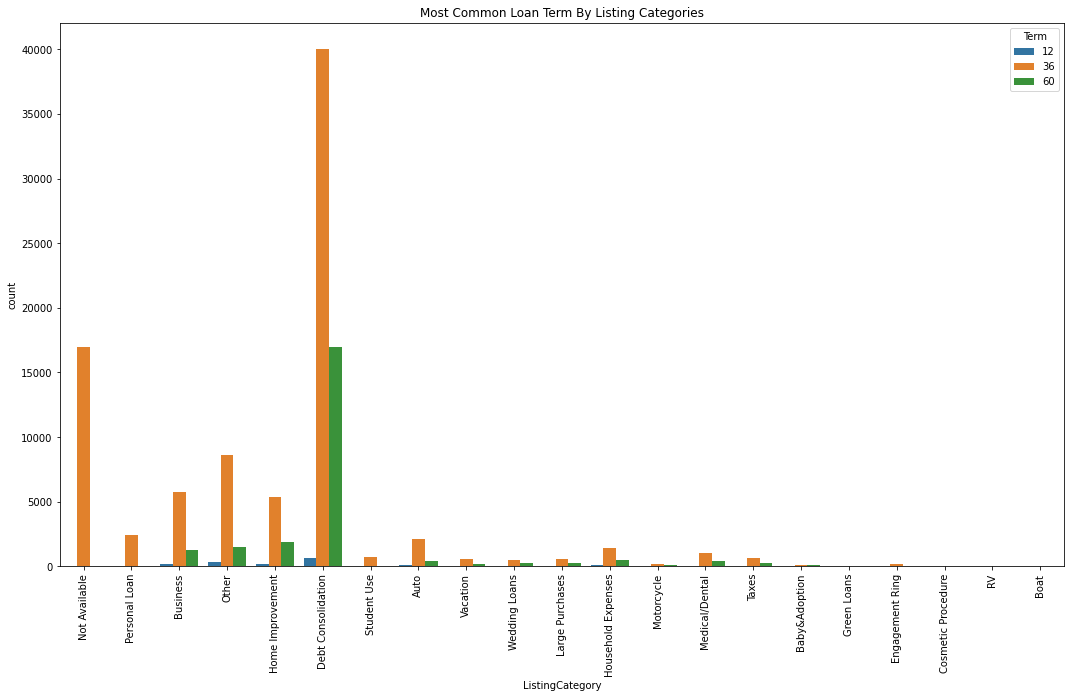

In [651]:
plt.figure(figsize=(18,10))
sb.countplot(data = df, x = 'ListingCategory', hue = 'Term')
plt.xticks(rotation=90)
plt.title('Most Common Loan Term By Listing Categories')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Some of the findings and relationships i found in this section are:
> - Lender yield and the estimated loss are positivly correlated.
> - Borrower APR, prosper score, number of investors, and loan amount have yearly patterns, for example, some of them tend to be high in the middle of the year and low in the end of the year.
> - Full-time employees mostly have high prosper scores, while self-employed individuals mostly have relativly lower prosper scores.
> - Borrowers from Maine and Iowa tend to have relativily lower borrowing APRs compared to other states.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The most common loan term for almost all listing categories is 36 months.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Correlations

I'm plotting a pairplot and correlation heatmap to investigate the correlations and relationships between the following features

- Term
- BorrowerState
- Occupation
- IsBorrowerHomeowner
- IncomeRange
- EmploymentStatus
- ListingCategory
- BorrowerRate
- LenderYield
- EstimatedLoss
- EstimatedReturn
- ProsperScore
- EmploymentStatusDuration
- StatedMonthlyIncome
- Investors

In [652]:
corr_columns = ['Term','BorrowerRate','LenderYield','EstimatedLoss','EstimatedReturn',
                'ProsperScore','EmploymentStatusDuration','StatedMonthlyIncome','Investors']

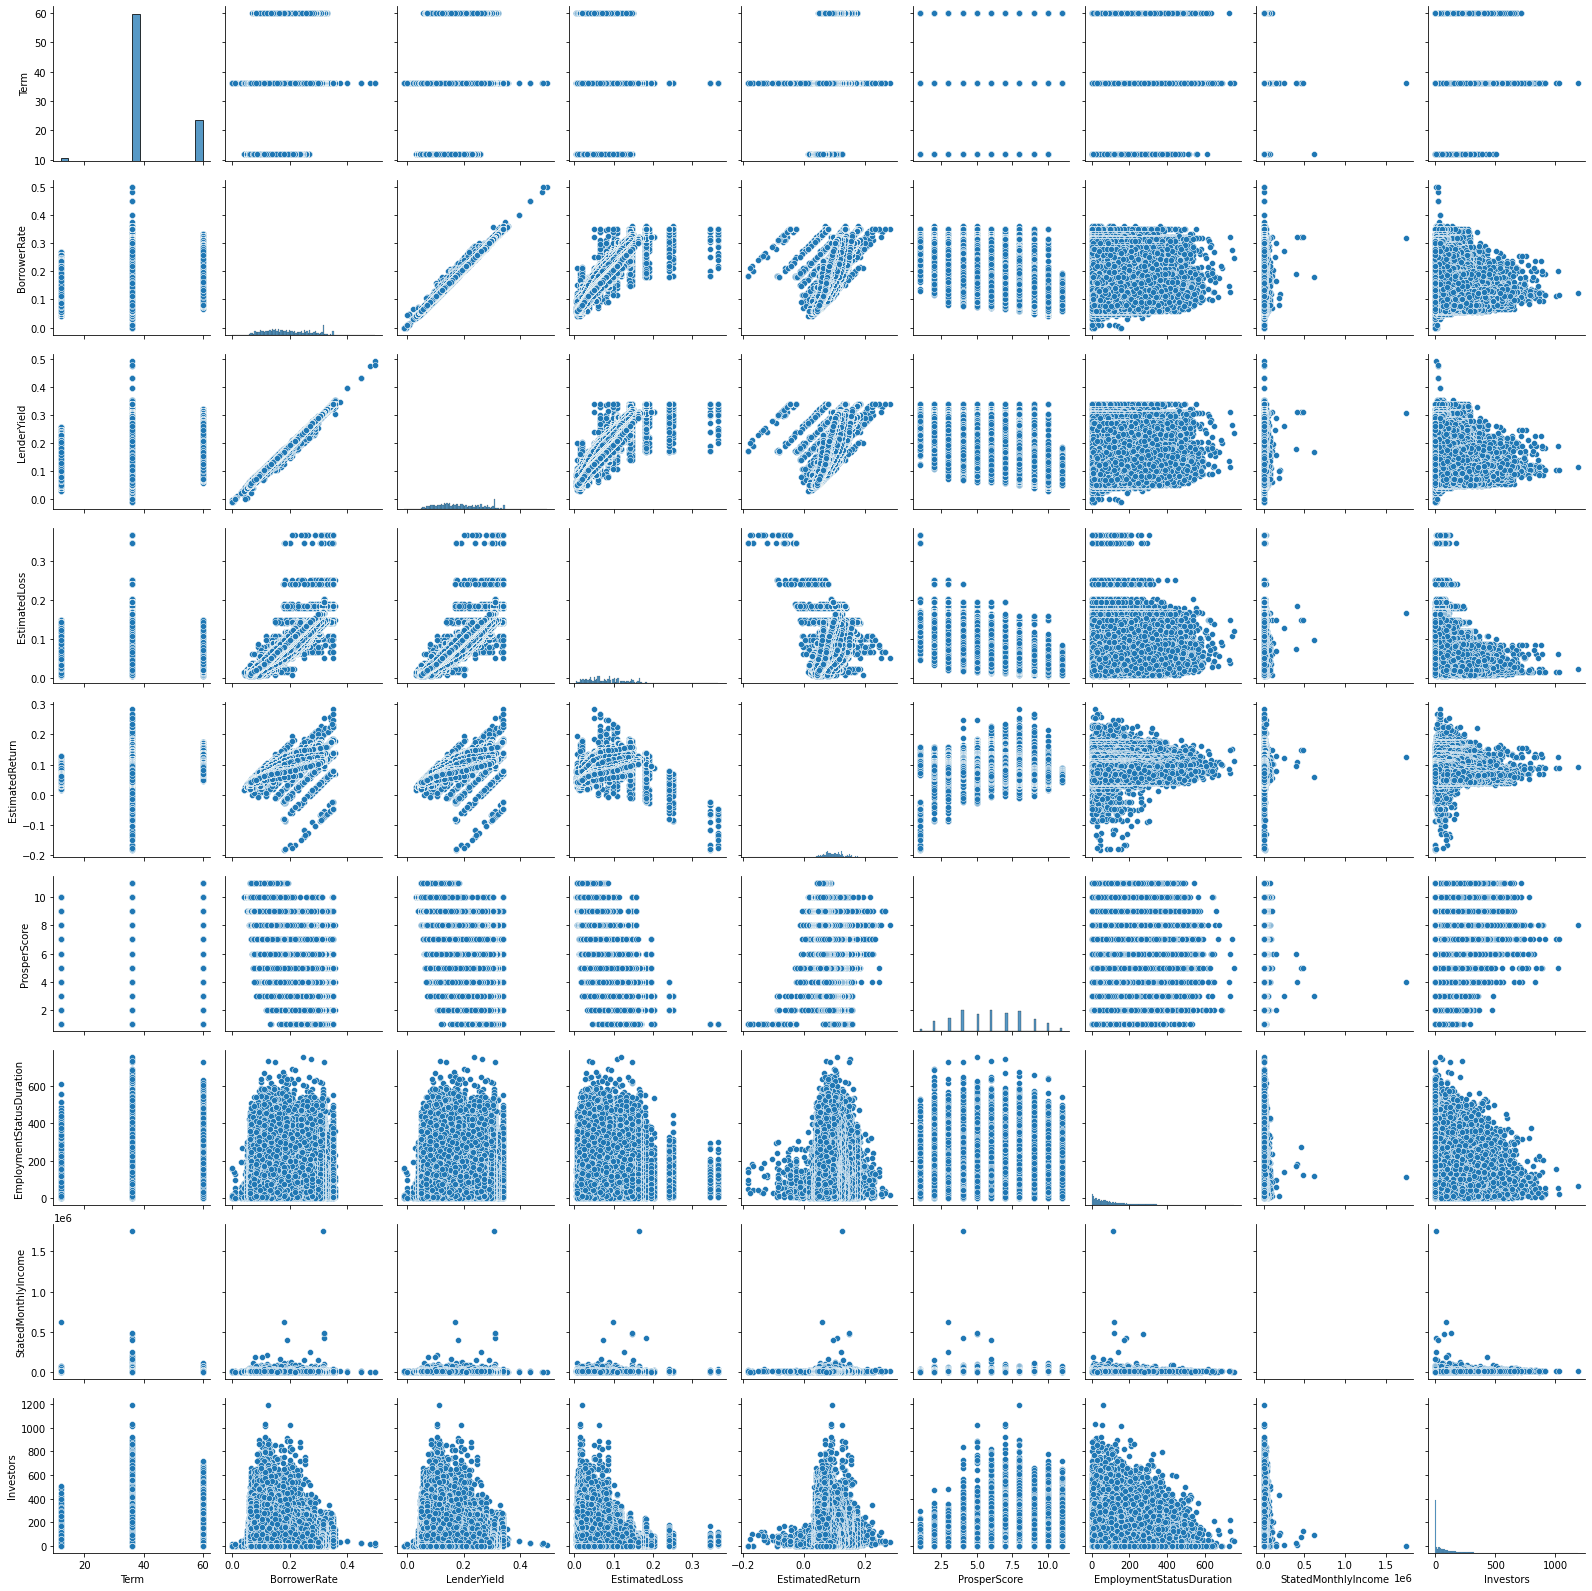

In [653]:
sb.pairplot(data=df[corr_columns])

[Text(0.5, 1.0, 'Correlation Heatmap')]

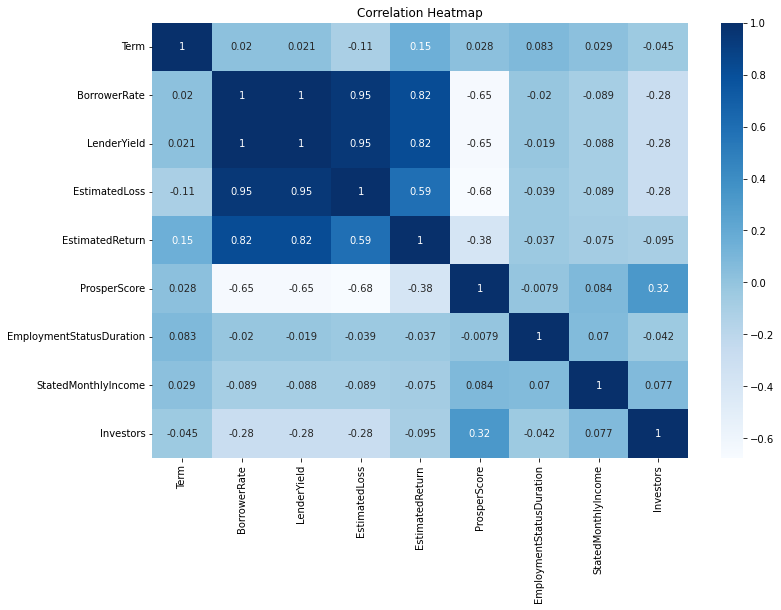

In [654]:
plt.figure(figsize=(12,8))
sb.heatmap(data=df[corr_columns].corr(), annot=True, cmap='Blues').set(title='Correlation Heatmap')

> - Both EstimatedLoss and EstimatedReturn have strong positive correlation with BorrowerRate and LenderYield.
> - ProsperScore has moderate negative correlations with BorrowerRate, LenderYield, and EstimatedLoss.

<AxesSubplot:xlabel='BorrowerRate', ylabel='EstimatedLoss'>

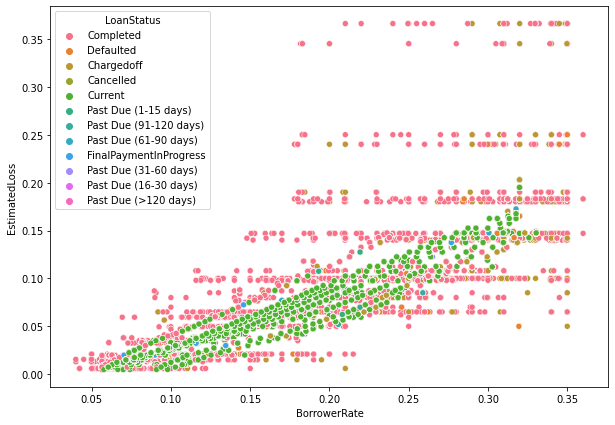

In [655]:
plt.figure(figsize=(10,7))
sb.scatterplot(data=df, x='BorrowerRate', y='EstimatedLoss', hue='LoanStatus')

> From the scatter plot above, we can see that the correlation between BorrowerRate and EstimatedLoss for current loans is relatively stronger than other loans with different status.

Text(0.5, 1.0, 'Number of Investors By Homeownership')

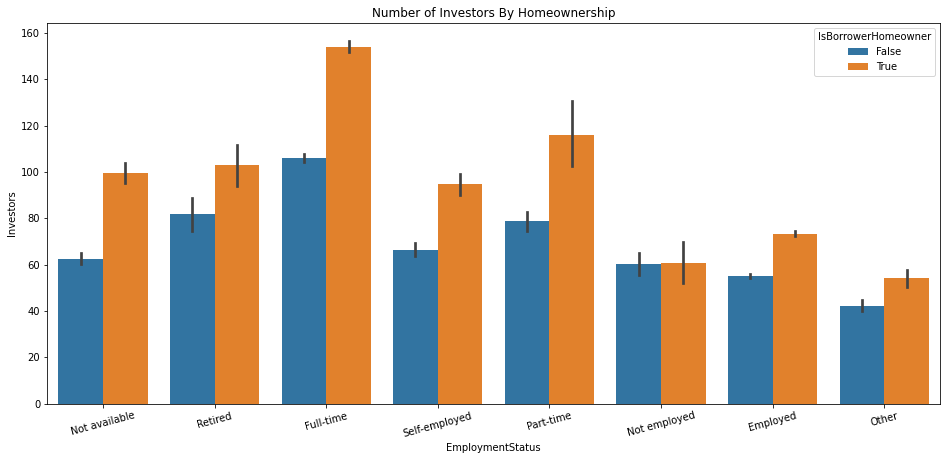

In [656]:
plt.figure(figsize=(16,7))
sb.barplot(data = df, x = 'EmploymentStatus', y = 'Investors', hue = 'IsBorrowerHomeowner')
plt.xticks(rotation=15)
plt.title('Number of Investors By Homeownership')

> Number of investors in loans borrowed by homeowners is higher than non-homeowners in almost all employment status.

Text(0.5, 1.0, 'Borrowing Rates By Homeownership')

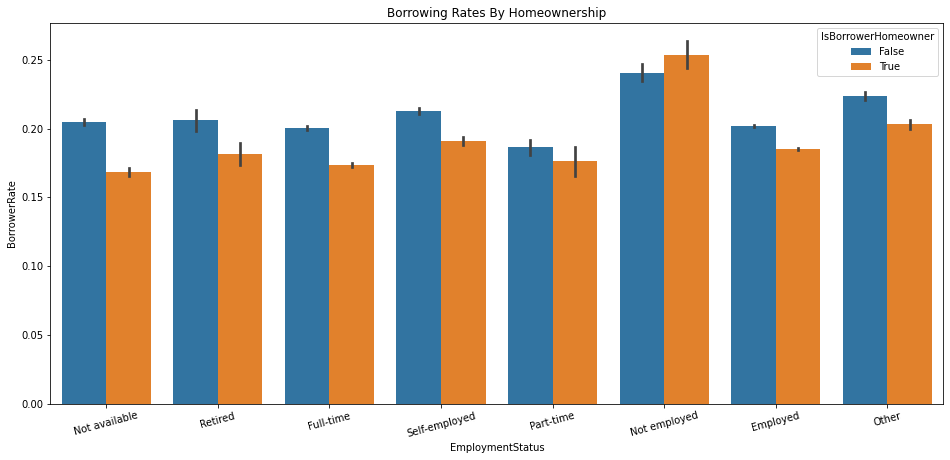

In [657]:
plt.figure(figsize=(16,7))
sb.barplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner')
plt.xticks(rotation=15)
plt.title('Borrowing Rates By Homeownership')

> Borrowing rates are slightly lower for homeowners in all employment status except for those who are not employed.

Text(0.5, 1.0, 'Borrowing Rates Per Term')

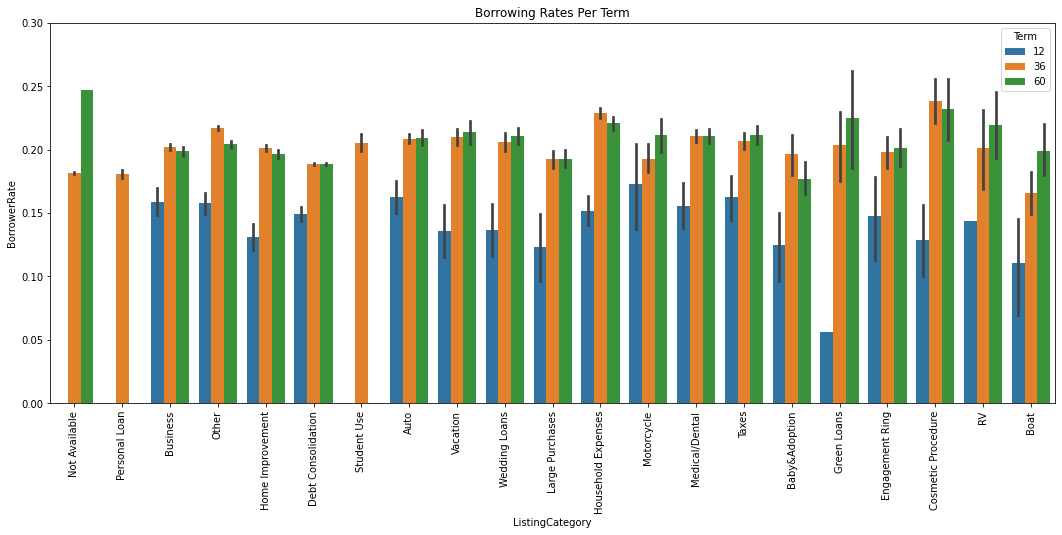

In [658]:
plt.figure(figsize=(18,7))
sb.barplot(data = df, x = 'ListingCategory', y = 'BorrowerRate', hue = 'Term')
plt.xticks(rotation=90)
plt.ylim(0,0.3)
plt.legend(loc='upper right', title='Term')
plt.title('Borrowing Rates Per Term')

> Borrowing rates for 12 months loans are the lowest in all listing categories.

Text(0.5, 1.0, 'Estimated Returns Per Term')

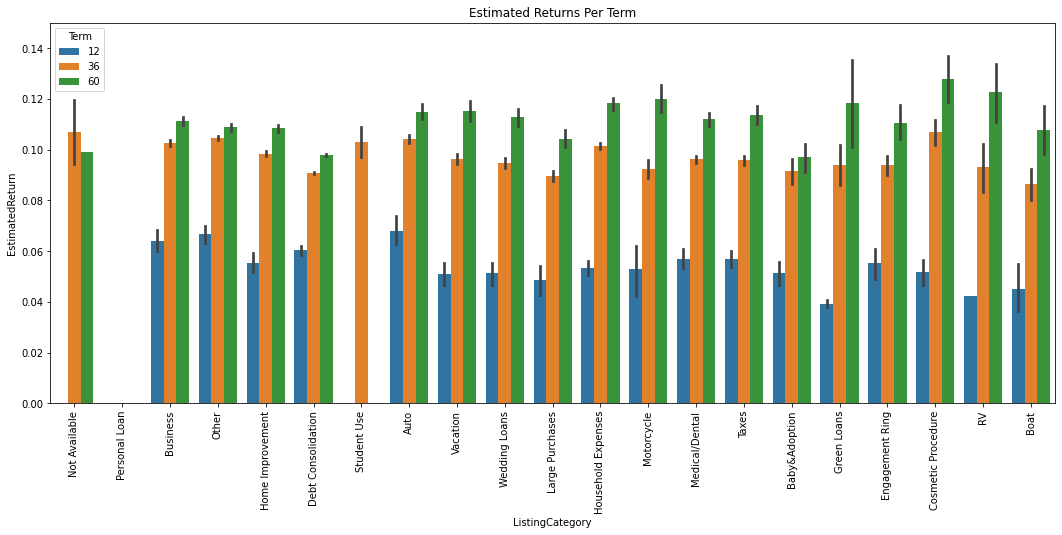

In [659]:
plt.figure(figsize=(18,7))
sb.barplot(data = df, x = 'ListingCategory', y = 'EstimatedReturn', hue = 'Term')
plt.xticks(rotation=90)
plt.ylim(0,0.15)
plt.legend(loc='upper left', title='Term')
plt.title('Estimated Returns Per Term')

> The estimated returns are the highest for 60 months loans, and the lowest for 12 months loans in all listing categories.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I investigated the rates further with various variables and found correlations between them, I also found that borrowing rates for 12 months loans are lower than the rates of other loans terms and 60 months loans have the best returns.

### Were there any interesting or surprising interactions between features?

> I found that investors tend to prefer loans lend to borrowers that are homeowners regardless of their employment status.

## Conclusions

- Loans listed at the beginning/end of the year have lower borrowing rates, on average but have a slightly higher risk from a lender perspective.
- Most self-employed borrowers tend to have a higher risk compared to other employment statuses, while most employed borrowers tend to have a lower risk. This is probably why most of the loans (over 80%) are lent to employed borrowers.
- Higher yields are positively correlated with higher losses, "high-risk, high-return".
- While short-term loans (12 months) provide the best borrowing rates, the best returns come from long-term loans (60 months) from a lender perspective.
- Homeownership makes a difference from an investor perspective since the number of investors in loans lend to homeowners is higher than non-homeowners. It also makes a difference in borrowing rates, on average, homeowners get lower rates except for unemployed borrowers.